In [1]:
# %matplotlib inline
from random import *
from matplotlib.pyplot import *
from math import *
from numpy import *
import numpy.random as rd
from scipy.misc import *
from scipy.special import *
from scipy.stats import *
from scipy.linalg import *
from pylab import *
#from scipy import *

In [61]:
def marche(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #alpha=0
        X=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for j in range(1,n):    
            z2=rd.uniform(0,1)
            if X[j]>=0:
                if z2<tabAlphaPlus[X[j-1]] :
                    X[j]=X[j-1]+1
                else :
                    X[j]=X[j-1]-1
            else :
                if z2<tabAlphaMoins[-X[j-1]] :
                    X[j]=X[j-1]+1
                else :
                    X[j]=X[j-1]-1
    #print("Alpha+:"+str(tabAlphaPlus))
    #print("Alpha-:"+str(tabAlphaMoins))
    #print("X:"+str(X))
    return X
    

        

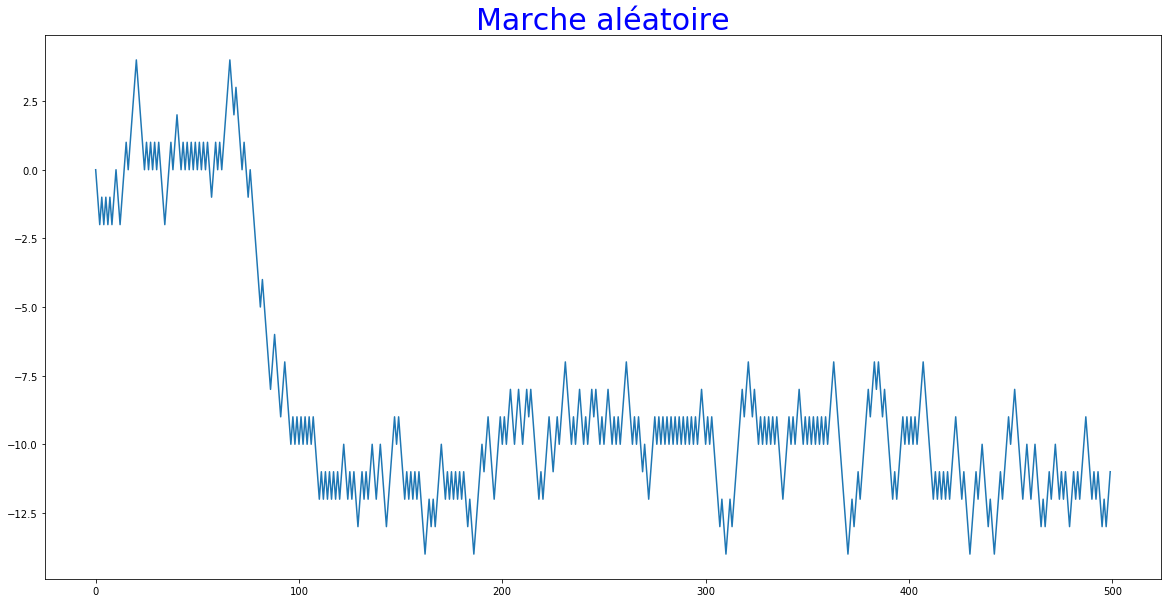

In [62]:
#a = 1/2
def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()
    

plot_marche(1/2,3/4,500)

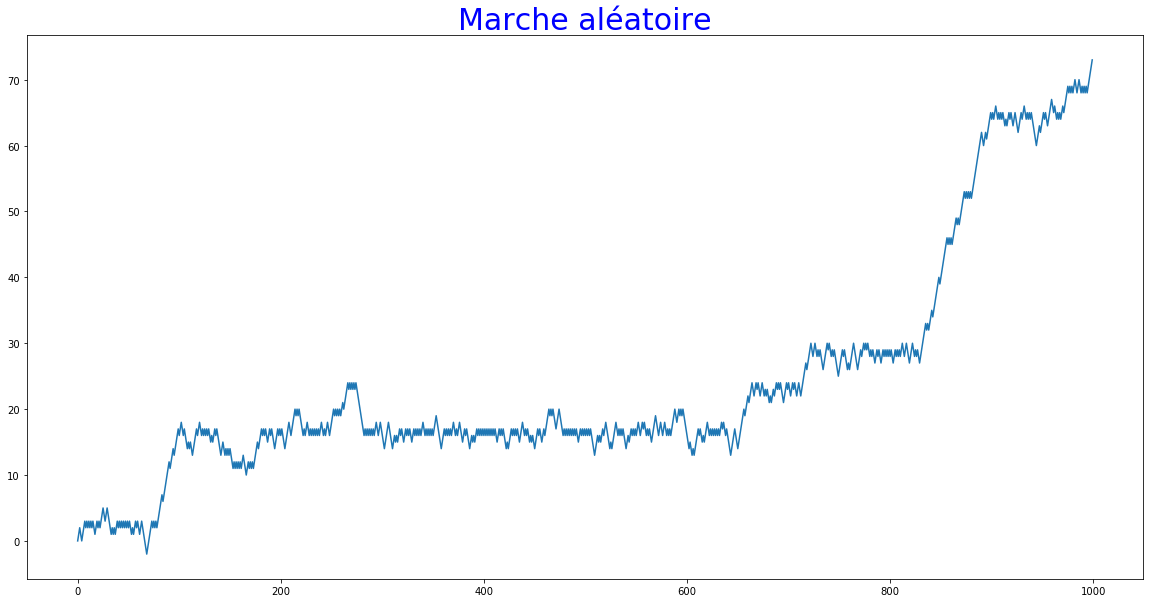

In [46]:
#a > 1/2
#On s'interesse qu cas eta < 0 donc a > 1/2

#X_n_alpha croit

def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()

plot_marche(2/3,3/4,1000)

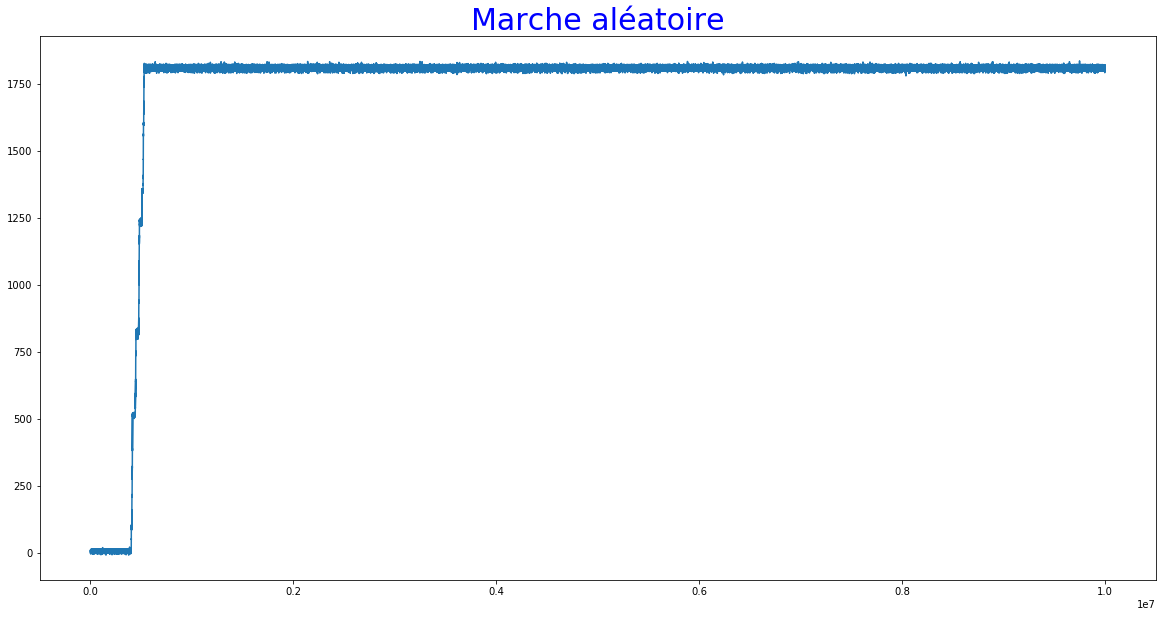

In [50]:
#a > 1/2
#On s'interesse qu cas eta < 0 donc a > 1/2
#X_n_alpha tend vers +infini

def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()
    
    
    

plot_marche(2/3,3/4,10000000)



In [65]:
def marche_xn_alpha_sur_n(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #alpha=0
        X=[0]*n
        XsurN=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for j in range(1,n):    
            z2=rd.uniform(0,1)
            if X[j]>=0:
                if z2<tabAlphaPlus[X[j-1]] :
                    XsurN[j]=(X[j-1]+1)/j
                    X[j]=(X[j-1]+1)
                else :
                    XsurN[j]=(X[j-1]-1)/j
                    X[j]=(X[j-1]-1)
            else :
                if z2<tabAlphaMoins[-1*X[j-1]] :
                    XsurN[j]=(X[j-1]+1)/j
                    X[j]=(X[j-1]+1)
                else :
                    XsurN[j]=(X[j-1]-1)/j
                    X[j]=(X[j-1]-1)
    #print("Alpha+:"+str(tabAlphaPlus))
    #print("Alpha-:"+str(tabAlphaMoins))
    #print("X:"+str(X))
    return XsurN
    

        

    
    

Espérance : 1.2222222222222223
Valeur de m: -0.10000000000000003
Y:4.250850127517002e-06


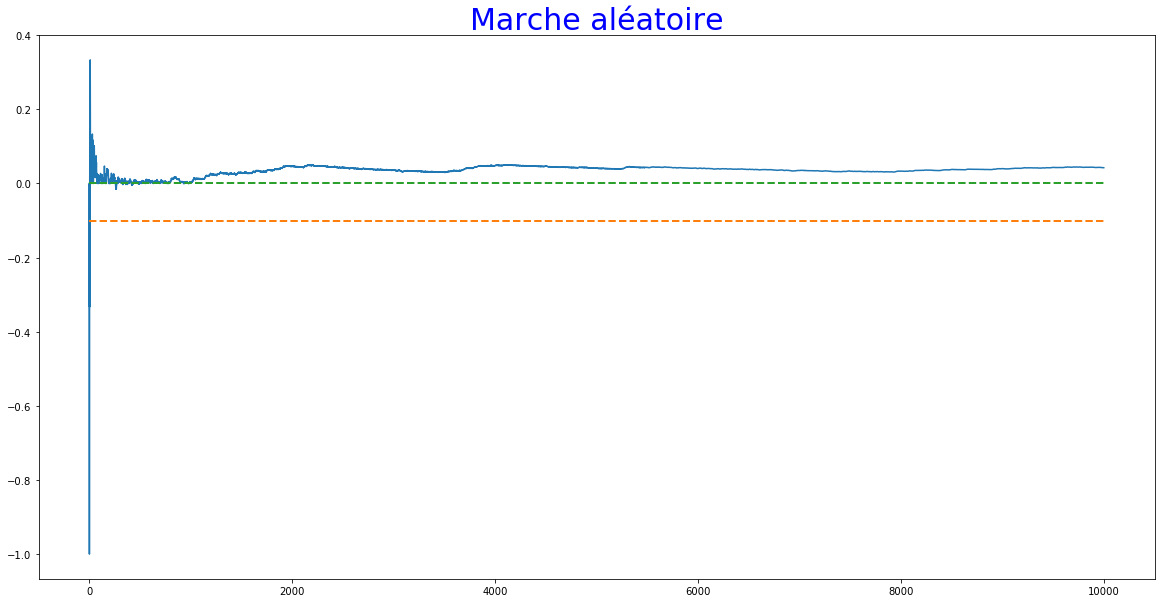

In [66]:
#a > 1/2
#On s'interesse qu cas eta < 0 donc a > 1/2
#Etudions la limite X_n_alpha/n

def plot_marche_xn_sur_n(a,b,n):
    es_ro = (a*(1-2*b)+b*b)/(b*(1-b))
    m= (1-es_ro)/(1+es_ro)
    
    print("Espérance : "+str(es_ro))
    print("Valeur de m: "+str(m))
    Y=np.array(marche_xn_alpha_sur_n(a,b,n))
    

    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    
    plt.plot(Y)
    print("Y:"+str(Y[n-1]/(n-1)))
    plt.plot([0,n],[m,m],linestyle="--",linewidth=2)
    plt.plot([0,n],[0,0],linestyle="--",linewidth=2)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()

plot_marche_xn_sur_n(2/3,3/4,10000)

Espérance : 0.8750000000000001
Valeur de m: 0.06666666666666661
Y:6.811362204327244e-06


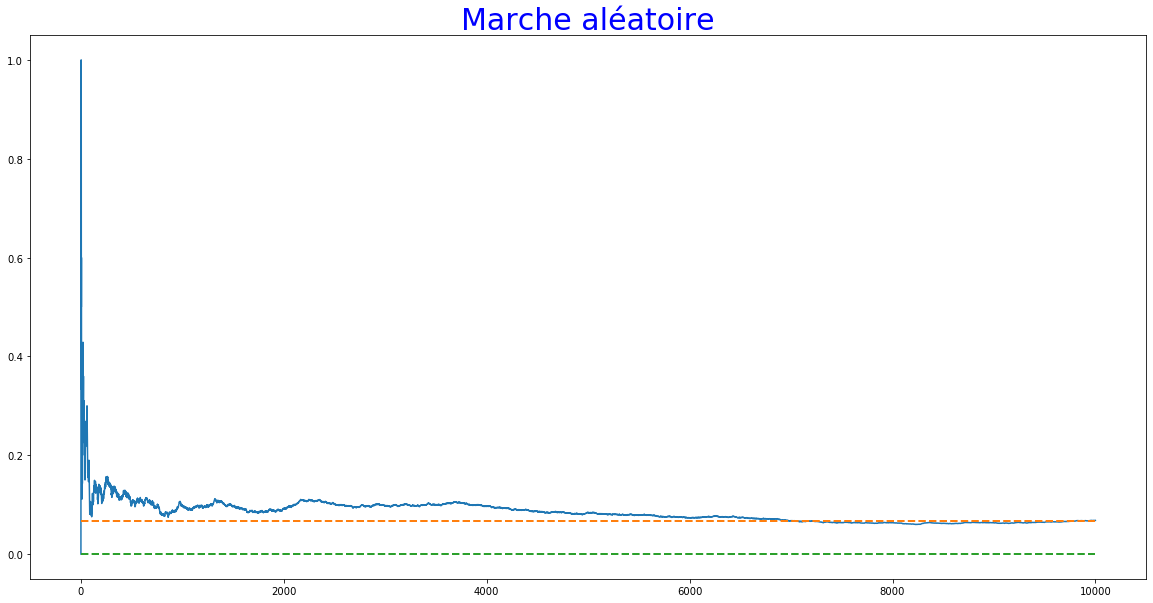

In [67]:


plot_marche_xn_sur_n(3/4,2/3,10000)